In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
filename = "/Users/thabisomakhathini/Downloads/EV_Registration_Dataset.csv"

In [3]:
 df = pd.read_csv(filename, names = None)

In [4]:
df.head()

,Identifier,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KL8CL6S05E,Tacoma,98407.0,2014,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82.0,0.0,27.0,259013639,POINT (-122.5113356 47.29238280000004),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
1,JTDKARFP0H,Port Townsend,98368.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,24.0,220589904,POINT (-122.76441969999996 48.11958740000006),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10
2,JHMZC5F34J,Vashon,98070.0,2018,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,0.0,34.0,109177015,POINT (-122.45867519999996 47.448468700000035),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,KMHC65LD0K,Ridgefield,98642.0,2019,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,0.0,18.0,196216282,POINT (-122.74348499999996 45.81886000000003),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
4,1N4AZ1CP6J,Bremerton,98337.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,26.0,187956821,POINT (-122.63590499999998 47.570970000000045),PUGET SOUND ENERGY INC,5.303508e+10


In [5]:
import numpy as np

In [6]:
# Identify missing values 
missing_data = df.isnull()
missing_data.head(5)

,Identifier,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Count missing values per column 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Identifier
False    135038
Name: Identifier, dtype: int64

City
False    135030
True          8
Name: City, dtype: int64

Postal Code
False    135030
True          8
Name: Postal Code, dtype: int64

Model Year
False    135038
Name: Model Year, dtype: int64

Make
False    135038
Name: Make, dtype: int64

Model
False    134789
True        249
Name: Model, dtype: int64

Electric Vehicle Type
False    135038
Name: Electric Vehicle Type, dtype: int64

Clean Alternative Fuel Vehicle (CAFV) Eligibility
False    135038
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

Electric Range
False    135037
True          1
Name: Electric Range, dtype: int64

Base MSRP
False    135037
True          1
Name: Base MSRP, dtype: int64

Legislative District
False    134726
True        312
Name: Legislative District, dtype: int64

Vehicle ID
False    135038
Name: Vehicle ID, dtype: int64

Vehicle Location
False    135028
True         10
Name: Vehicle Location, dtype: int64

Electric Utilit

In [8]:
# Drop missing values  
new_df = df.dropna() 

In [9]:
# Verify if missing values where dropped 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134474 entries, 0 to 135037
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Identifier                                         134474 non-null  object 
 1   City                                               134474 non-null  object 
 2   Postal Code                                        134474 non-null  float64
 3   Model Year                                         134474 non-null  int64  
 4   Make                                               134474 non-null  object 
 5   Model                                              134474 non-null  object 
 6   Electric Vehicle Type                              134474 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  134474 non-null  object 
 8   Electric Range                                     134474 non-null  float6

In [10]:
#Check duplicates 
new_df.duplicated().sum()

0

In [11]:
#Correct Typos 
#get all the unique values in the Clean Alternative Fuel Vehicle (CAFV) Eligibility column
new_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [12]:
#convert to lower case
new_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = new_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.capitalize()

In [13]:
new_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean alternative fuel vehicle eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [14]:
# Summarize the key statistics for numerical features and identify any anomalies or outliers
new_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,Vehicle ID,2020 Census Tract
count,134474.000000,134474.000000,134474.000000,134474.000000,134474.000000,1.344740e+05,1.344740e+05
mean,98259.228520,2019.657250,74.730208,1451.396069,29.499911,2.063218e+08,5.303964e+10
std,303.069045,3.001443,98.776037,9691.900720,14.786294,8.590842e+07,1.617660e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.601798e+08,5.303301e+10
50%,98122.000000,2021.000000,21.000000,0.000000,34.000000,2.059191e+08,5.303303e+10
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308773e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


In [15]:
# Summarize categoric features 
new_df.describe(include=['object'])

,Identifier,City,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,134474,134474,134474,134474,134474,134474,134474,134474
unique,9017,454,36,125,2,3,530,75
top,5YJYGDEE9M,Seattle,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean alternative fuel vehicle eligible,POINT (-122.12301999999994 47.67668000000003),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,471,23408,61650,25752,103424,61082,3476,49285


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [18]:
import seaborn as sns

<Axes: xlabel='Electric Vehicle Type', ylabel='Electric Range'>

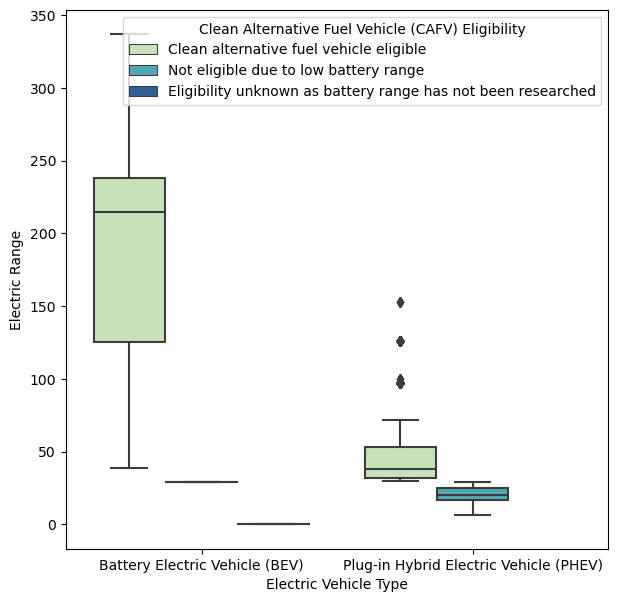

In [19]:
#Analyze the distribution of categorical variables
plt.figure(figsize=(7,7))
sns.boxplot(x = "Electric Vehicle Type", y= "Electric Range" , data = new_df, 
            hue ="Clean Alternative Fuel Vehicle (CAFV) Eligibility", palette = "YlGnBu")

<Axes: xlabel='Base MSRP', ylabel='Make'>

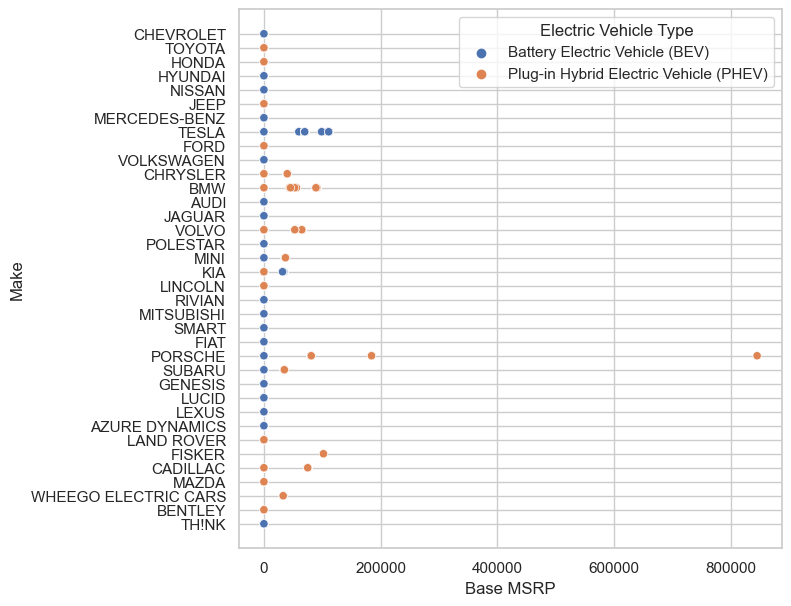

In [54]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=new_df, x="Base MSRP", y="Make", hue="Electric Vehicle Type")